In [ ]:
#generate the impeadance data for a two step profile with delta= 0.5
#plot the phase angle vs freq, bode plot for the generated data

#open the Basudevs Paper and study what the method of dip angle analysis is
#see the bode plot and using the method of dip angle analysis, predict the 2-step profile which fits this data , predict the lin and inv-lin using the dip angle analysis

In [ ]:
get_impedance(profile="two_step",params=[],frequencies=[])

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


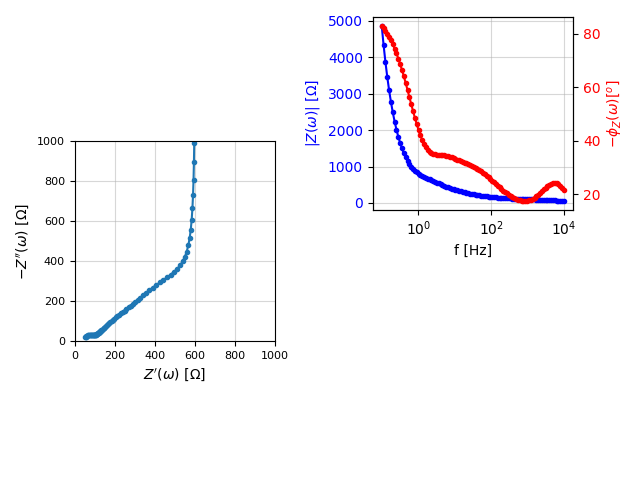

In [1]:
%matplotlib ipympl
from models import *
# from models import find_index_of_nearest
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from arbitau import give_z_for_arbitary_tau, tau_plotter
from scipy.integrate import solve_bvp


#gen data

freq_list=np.logspace(-1,4,100)

Q=6.61e-4
alpha=1

R1=5.22*194.5
delta1=0.12
R2=3.47*194.5
delta2=0.17
R3=2.15*194.5

Rhfr=40
Rrxn=40
Qdl=1e-6
alpha2=1

cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMtwo_1-R_1-p(R_2,CPE_1)")

zexp=cmodel.predict(frequencies=freq_list)

fig= plt.figure()
ax_nyq=fig.add_subplot(121)
ax_mag=fig.add_subplot(222)
ax_phs=ax_mag.twinx()

#plot nyquist plot of the taken data
plot_nyquist(zexp,ax=ax_nyq,labelsize=10,ticksize=8)
ax_nyq.set_xlim(0,1000)
ax_nyq.set_ylim(0,1000)

#plot bode plot of the taken data
ax_mag.plot(freq_list, np.abs(zexp), '.-', color="blue")
ax_phs.plot(freq_list, -np.angle(zexp, deg=True), '.-',color="red")
ax_mag.set_ylabel(r'$|Z(\omega)|$ ' +'$[{}]$'.format("Ω"), fontsize=10,color="blue")
ax_phs.set_ylabel(r'$-\phi_Z(\omega)$' + r'$[^o]$', fontsize=10,color="red")
ax_mag.set_xlabel('f [Hz]', fontsize=10)
ax_mag.set_xscale('log')
ax_mag.tick_params(axis='y', labelcolor="blue")
ax_phs.tick_params(axis='y', labelcolor="red")
ax_mag.grid(visible=True, which='major', axis='both', alpha=.5)
fig.tight_layout()